In [1]:
# zillow_final

# Zillow Regression Project: Estimating Home Value

## James Allen

## September 15th, 2021


## Executive Summary 
- This is where I need to complete my executive summary

- goal

- takeaways



In [2]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

from acquire import get_zillow_data, clean_zillow
from prepare import remove_outlier, train_validate_test, get_object_cols, get_numeric_X_cols, min_max_scale

# Project Planning

### Initial Thoughts:
- What is classified as a single unit property and how are they classified?
- What features are needed for predicting property value?
- Is there a current or previous property value?
- Do bedrooms, bathrooms, and square feet contribute or affect property value?
- 'Hot Months' = May, June, July, August
- Looking at 2017 data



# Acquire

In [3]:
# getting my zillow data using my function 'get_zillow_data' from my acquire file
df = get_zillow_data()

In [4]:
df.head() # check_yo_head

,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id.1,logerror,transactiondate
0,14634203,2026522,1.0,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,289445.0,2016.0,213516.0,3490.16,NaN,NaN,6.059001e+13,625,-0.061973,2017-08-04
1,11721753,616260,NaN,NaN,NaN,2.0,3.0,NaN,6.0,2.0,...,205123.0,2016.0,163175.0,2627.48,NaN,NaN,6.037220e+13,1018,0.017785,2017-07-21
2,11289917,2061546,1.0,NaN,NaN,2.0,3.0,NaN,6.0,2.0,...,136104.0,2016.0,27214.0,2319.90,Y,15.0,6.037901e+13,1248,-0.362001,2017-06-23
3,11637029,2554497,1.0,NaN,NaN,2.0,3.0,NaN,9.0,2.0,...,810694.0,2016.0,554156.0,9407.01,Y,13.0,6.037701e+13,1734,-0.093399,2017-07-28
4,11705026,1834372,NaN,NaN,NaN,1.0,2.0,NaN,6.0,1.0,...,35606.0,2016.0,23624.0,543.69,NaN,NaN,6.037232e+13,1772,-0.146056,2017-06-30


In [5]:
# taking a look at the data info
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38622 entries, 0 to 38621
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      38622 non-null  int64  
 1   id                            38622 non-null  int64  
 2   airconditioningtypeid         12224 non-null  float64
 3   architecturalstyletypeid      101 non-null    float64
 4   basementsqft                  27 non-null     float64
 5   bathroomcnt                   38622 non-null  float64
 6   bedroomcnt                    38622 non-null  float64
 7   buildingclasstypeid           0 non-null      float64
 8   buildingqualitytypeid         23706 non-null  float64
 9   calculatedbathnbr             38463 non-null  float64
 10  decktypeid                    333 non-null    float64
 11  finishedfloor1squarefeet      3339 non-null   float64
 12  calculatedfinishedsquarefeet  38509 non-null  float64
 13  f

In [6]:
# looking at the number of rows and columns in the zillow data
df.shape

(38622, 62)

### Acquire Takeaways
- way too many columns (62) in the zillow data that are not needed
- will need to either drop columns or just select the needed columns to use for the project
- will need to also rename columns in order to make them eaiser to read and use
- will need to drop remaining null values in the zillow data

# Prepare

In [7]:
# getting my clean data function 'clean_zillow' from my acquire file
df = clean_zillow(df)

In [8]:
df.head() # check_yo_head

,sqft,baths,beds,tax_value,year_built,fips
parcel_id,,,,,,
14634203,1125.0,2.0,3.0,289445.0,1974.0,6059.0
11721753,1316.0,2.0,3.0,205123.0,1923.0,6037.0
11289917,1458.0,2.0,3.0,136104.0,1970.0,6037.0
11637029,1766.0,2.0,3.0,810694.0,1980.0,6037.0
11705026,1421.0,1.0,2.0,35606.0,1911.0,6037.0


In [9]:
# taking a look at rows and columns after cleaning data, I now have 7 columns 
df.shape

(38480, 6)

In [10]:
# checking for nulls in my clean data
df.isna().sum()

sqft          0
baths         0
beds          0
tax_value     0
year_built    0
fips          0
dtype: int64

In [11]:
# using my 'remove_outlier' function
df = remove_outlier(df)

In [12]:
df.head() # check_yo_head

,sqft,baths,beds,tax_value,year_built,fips
parcel_id,,,,,,
14634203,1125.0,2.0,3.0,289445.0,1974.0,6059.0
11721753,1316.0,2.0,3.0,205123.0,1923.0,6037.0
11289917,1458.0,2.0,3.0,136104.0,1970.0,6037.0
11637029,1766.0,2.0,3.0,810694.0,1980.0,6037.0
11705026,1421.0,1.0,2.0,35606.0,1911.0,6037.0


In [13]:
# looking at the columns and rows of my data
df.shape

(37932, 6)

In [14]:
# some quick stats on my data
df.describe()

,sqft,baths,beds,tax_value,year_built,fips
count,37932.000000,37932.000000,37932.000000,3.793200e+04,37932.000000,37932.000000
mean,1718.707925,2.243726,2.999631,4.437589e+05,1969.395286,6049.943214
std,816.845877,0.878913,0.997558,3.571404e+05,22.938633,21.452752
min,240.000000,0.000000,0.000000,1.000000e+03,1878.000000,6037.000000
25%,1168.000000,2.000000,2.000000,2.068960e+05,1954.000000,6037.000000
50%,1512.000000,2.000000,3.000000,3.588795e+05,1971.000000,6037.000000
75%,2049.000000,3.000000,4.000000,5.634630e+05,1987.000000,6059.000000
max,11020.000000,10.000000,11.000000,2.381729e+06,2016.000000,6111.000000


In [15]:
# double checking for nulls in my data
df.isna().sum()

sqft          0
baths         0
beds          0
tax_value     0
year_built    0
fips          0
dtype: int64

<AxesSubplot:>

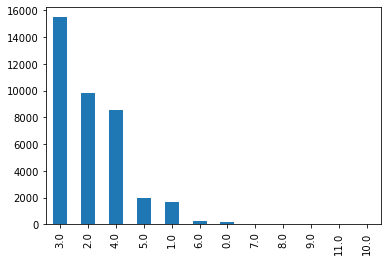

In [16]:
# visualizing the amount of bedrooms 'beds' in my data using a bar chart
# 3 bedrooms is the most popular
df.beds.value_counts().plot.bar()

<AxesSubplot:>

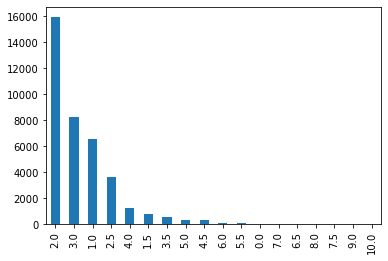

In [17]:
# visualizing the amount of bathrooms 'baths' in my data
# 2 bathrooms is the most popular
df.baths.value_counts().plot.bar()

In [18]:
# setting my target to 'tax_value'
target = 'tax_value'

# splitting up my data using the function in my prepare.py
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = train_validate_test(df, target)

# taking a look at my train data shape, should be the largest amount of data
train.shape, validate.shape, test.shape

((21241, 6), (9104, 6), (7587, 6))

In [19]:
# taking a look at my validate data shape, should be less than the train data but larger than the test data
validate.shape

(9104, 6)

In [20]:
# taking a look at my test data shape, should be the smallest amount of data
test.shape

(7587, 6)

In [21]:
# assigning my function to 'obj_cols'
obj_cols = get_object_cols(df)

# assigning my funtction to 'num_cols'
num_cols = get_numeric_X_cols(X_train, obj_cols)

# scaling the data
X_train_scaled, X_validate_scaled, X_test_scaled = min_max_scale(X_train, X_validate, X_test, num_cols)

# looking at the scaled data
X_train_scaled

,sqft,baths,beds,year_built,fips
12903303,0.082282,0.2500,0.333333,0.688406,0.000000
14300778,0.123840,0.2500,0.444444,0.673913,0.297297
12087527,0.203525,0.3750,0.555556,0.623188,0.000000
11999756,0.135436,0.3750,0.222222,0.949275,0.000000
12138584,0.105937,0.3750,0.222222,0.695652,0.000000
...,...,...,...,...,...
11838263,0.104824,0.2500,0.222222,0.586957,0.000000
13033221,0.074026,0.2500,0.111111,0.942029,0.000000
17111277,0.205844,0.5000,0.444444,0.927536,1.000000
10895957,0.087291,0.2500,0.222222,0.666667,0.000000


# Explore

In [22]:
train.head()

,sqft,baths,beds,tax_value,year_built,fips
parcel_id,,,,,,
12903303,1127.0,2.0,3.0,130685.0,1973.0,6037.0
14300778,1575.0,2.0,4.0,70231.0,1971.0,6059.0
12087527,2434.0,3.0,5.0,460903.0,1964.0,6037.0
11999756,1700.0,3.0,2.0,1695583.0,2009.0,6037.0
12138584,1382.0,3.0,2.0,110618.0,1974.0,6037.0


In [23]:
train.sqft.describe()

count    21241.000000
mean      1714.382797
std        821.267232
min        240.000000
25%       1161.000000
50%       1507.000000
75%       2047.000000
max      11020.000000
Name: sqft, dtype: float64

In [24]:
train.beds.describe()

count    21241.000000
mean         2.992656
std          1.001196
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          9.000000
Name: beds, dtype: float64

In [25]:
train.baths.describe()

count    21241.000000
mean         2.240761
std          0.883537
min          0.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: baths, dtype: float64

In [26]:
train.tax_value.describe()

count    2.124100e+04
mean     4.433217e+05
std      3.563480e+05
min      1.050400e+04
25%      2.064290e+05
50%      3.589790e+05
75%      5.634630e+05
max      2.381729e+06
Name: tax_value, dtype: float64

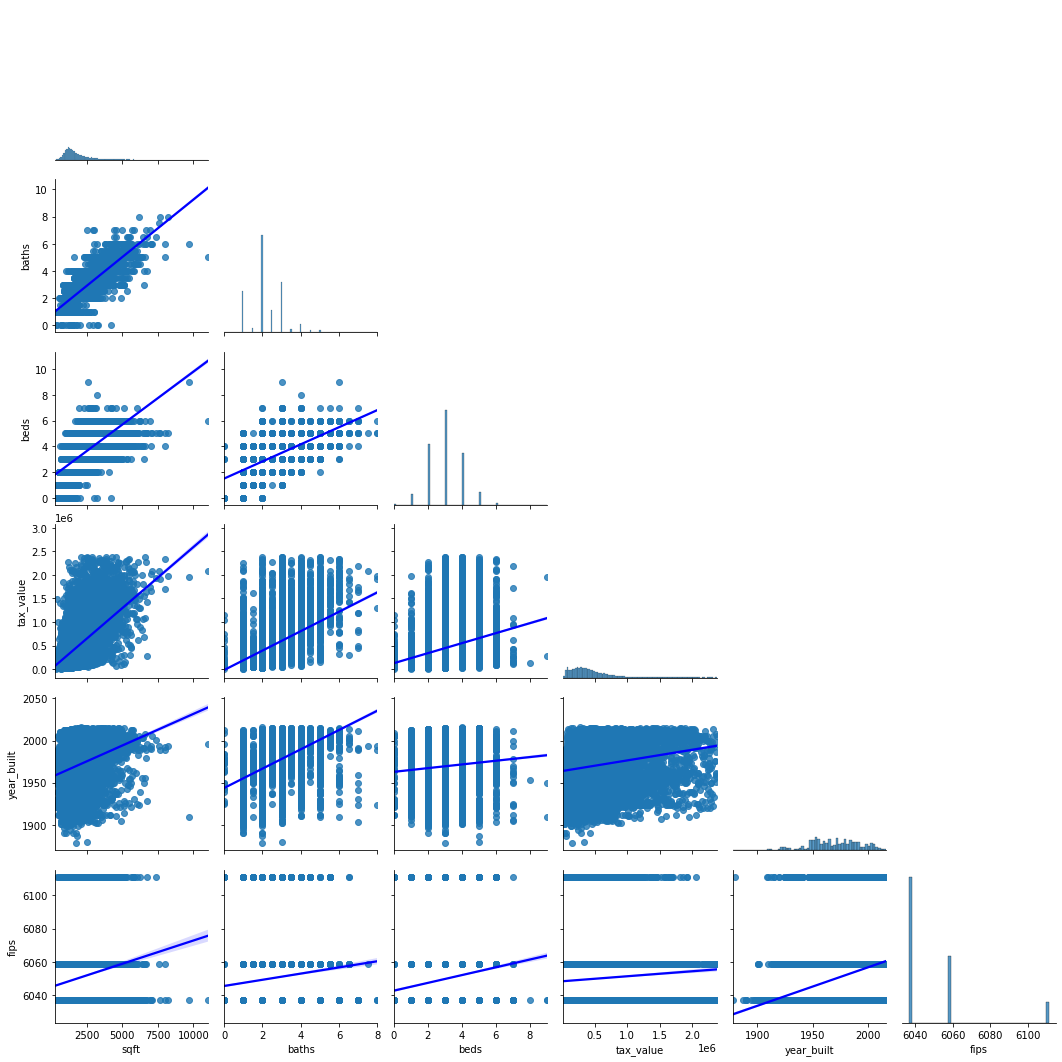

In [27]:
# plotting the pairs
sns.pairplot(train, kind = 'reg', corner=True, plot_kws = {'line_kws': {'color': 'blue'}})

<AxesSubplot:>

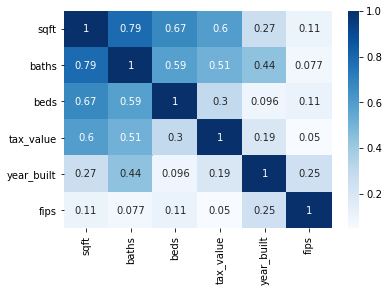

In [28]:
# creating a heatmap to show correlations
correlation_table = train.corr()
# sns.heatmap(correlation_table, cmap='Blues', annot=True, vmin=0, vmax=1)
sns.heatmap(correlation_table, cmap='Blues', annot=True)

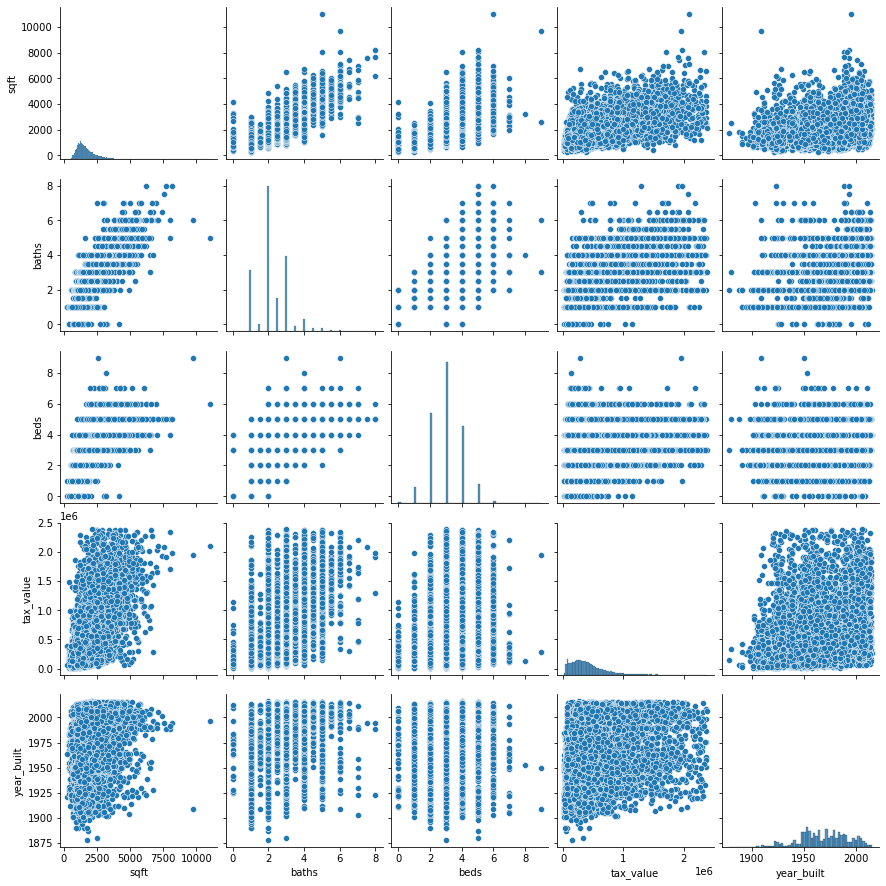

In [29]:
sns.pairplot(train.drop(columns='fips'))

<AxesSubplot:ylabel='Frequency'>

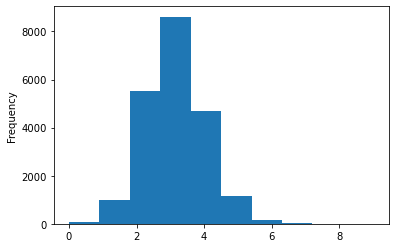

In [30]:
# making histograms of beds
train.beds.plot.hist()

<AxesSubplot:ylabel='Frequency'>

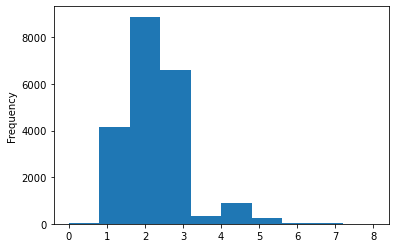

In [31]:
# making histogram of baths

train.baths.plot.hist()

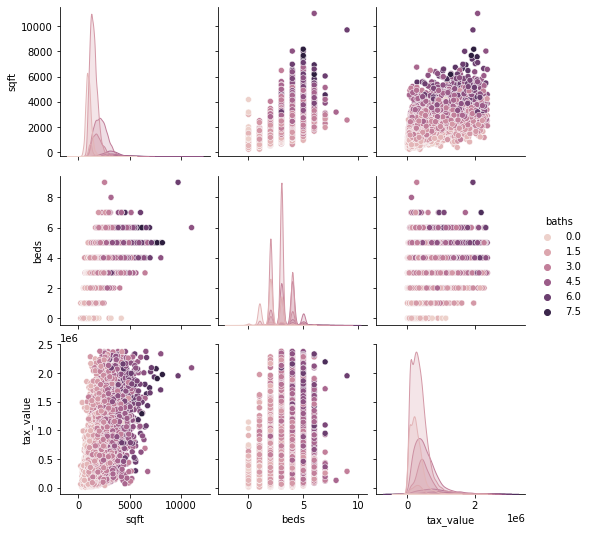

In [32]:
sns.pairplot(train.drop(columns=['fips', 'year_built']), hue='baths')

# Stats

In [33]:
# setting my alpha
alpha = .05

### establishing my initial hypothesis of number of bedrooms and tax value

$H_O$: There is no correlation between number of bedrooms and tax value.

$H_a$: There is a correlation between number of bedrooms and tax value.

In [34]:
train.head() # check_yo_head

,sqft,baths,beds,tax_value,year_built,fips
parcel_id,,,,,,
12903303,1127.0,2.0,3.0,130685.0,1973.0,6037.0
14300778,1575.0,2.0,4.0,70231.0,1971.0,6059.0
12087527,2434.0,3.0,5.0,460903.0,1964.0,6037.0
11999756,1700.0,3.0,2.0,1695583.0,2009.0,6037.0
12138584,1382.0,3.0,2.0,110618.0,1974.0,6037.0


In [35]:
# t_test
t, p = stats.ttest_ind(train.tax_value, train.beds, equal_var=False)

print(t, p)

if p < alpha:
    print(f'\nWe can reject the null hypothesis.')
else:
    print(f'\nWe fail to reject the null hypothesis.')

181.31309433554023 0.0

We can reject the null hypothesis.


In [36]:
# pearsonr test
corr, p = stats.pearsonr(train.beds, train.tax_value)

print(corr, p)

if p < alpha:
    print(f'\nWe can reject the null hypothesis.')
else:
    print(f'\nWe fail to reject the null hypothesis.')

0.2991673270791138 0.0

We can reject the null hypothesis.


### Both tests rejected the null hypothesis of 'There is no correlation between number of bedrooms and tax value'

### Establishing additional hypothesis of number of bathrooms and tax value

$H_O$: There is no correlation between number of bathrooms and tax value.

$H_a$: There is a correlation between number of bathrooms and tax value.

In [37]:
# t_test
t, p = stats.ttest_ind(train.tax_value, train.baths, equal_var=False)

print(t, p)

if p < alpha:
    print(f'\nWe can reject the null hypothesis.')
else:
    print(f'\nWe fail to reject the null hypothesis.')

181.31340185351732 0.0

We can reject the null hypothesis.


In [38]:
# pearsonr test
corr, p = stats.pearsonr(train.baths, train.tax_value)

print(t, p)

if p < alpha:
    print(f'\nWe can reject the null hypothesis.')
else:
    print(f'\nWe fail to reject the null hypothesis.')

181.31340185351732 0.0

We can reject the null hypothesis.


### Both tests rejected the null hypothesis of 'There is no correlation between number of bedrooms and tax value'

# Modeling

In [39]:
y_train.head() #check_yo_head

parcel_id
12903303     130685.0
14300778      70231.0
12087527     460903.0
11999756    1695583.0
12138584     110618.0
Name: tax_value, dtype: float64

In [40]:
# making y_train and y_validate into dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
y_test = pd.DataFrame(y_test)
X_test = pd.DataFrame(X_test)

In [41]:
y_train.head()

,tax_value
parcel_id,
12903303,130685.0
14300778,70231.0
12087527,460903.0
11999756,1695583.0
12138584,110618.0


# Baseline

In [42]:
# tax_value mean
tax_value_pred_mean = y_train['tax_value'].mean()
y_train['tax_value_pred_mean'] = tax_value_pred_mean
y_validate['tax_value_pred_mean'] = tax_value_pred_mean

# tax_value_median
tax_value_pred_median = y_train['tax_value'].median()
y_train['tax_value_pred_median'] = tax_value_pred_median
y_validate['tax_value_pred_median'] = tax_value_pred_median

# RMSE of tax_value_pred_mean
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_mean)**(1/2)

# RMSE mean baseline
print("Baseline", "RMSE Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

Baseline RMSE Mean
Train/In-Sample:  356339.63 
Validate/Out-of-Sample:  363349.44


In [43]:
# RMSE of tax_value_pred_median
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_median)**(1/2)
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_median)**(1/2)

# RMSE median baseline
print("Baseline", "RMSE Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

Baseline RMSE Median
Train/In-Sample:  366185.22 
Validate/Out-of-Sample:  374377.15


In [44]:
# r2 baseline
r2_baseline = r2_score(y_validate.tax_value, y_validate.tax_value_pred_mean)
print(f'The baseline r^2 score is {r2_baseline}')

The baseline r^2 score is -0.0002779766826399577


# Linear Regression (OLS)

In [45]:
# Linear Regression (OLS)

# create the model object
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series!
lm.fit(X_train_scaled,y_train.tax_value)

# predict train
y_train['tax_value_pred_lm'] = lm.predict(X_train_scaled)

# evaluate: RMSE for train
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_lm)**(1/2)

# predict validate
y_validate['tax_value_pred_lm'] = lm.predict(X_validate_scaled)

# evaluate the RMSE for validate
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_lm)**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  279586.6872272128 
Validation/Out-of-Sample:  287686.08178613323


In [46]:
# r2 score
r2_score_lm = r2_score(y_validate.tax_value, y_validate.tax_value_pred_lm)
r2_score_lm

0.3729395208563575

# LassoLars

In [47]:
# LassoLars
#create model object
lars = LassoLars(alpha=1.0)

#fit the model to our training data, specify column since it is a dataframe
lars.fit(X_train_scaled,y_train.tax_value)

#predict train
y_train['tax_value_pred_lars'] = lars.predict(X_train_scaled)

#evaluate the RMSE for train
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_lars)**(1/2)

#predict validate
y_validate['tax_value_pred_lars'] = lars.predict(X_validate_scaled)

#evaluate the RMSE for validate
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_lars)**(1/2)

print("RMSE for OLS using Lasso+Lars\nTraining/In-Sample: ",rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using Lasso+Lars
Training/In-Sample:  279587.09985956753 
Validation/Out-of-Sample:  287705.62316667417


In [48]:
# r2 score lars
r2_score_lars = r2_score(y_validate.tax_value, y_validate.tax_value_pred_lars)
r2_score_lars

0.37285433047426253

# TweedieRegressor (GLM)

In [49]:
# TweedieRegressor (GLM)
#create model object
glm = TweedieRegressor(power =0, alpha=0.0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train_scaled,y_train.tax_value)

# predict train
y_train['tax_value_pred_glm'] = glm.predict(X_train_scaled)

# evaluate: RMSE
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_glm)**(1/2)

# predict validate
y_validate['tax_value_pred_glm'] = glm.predict(X_validate_scaled)

# evaluate: RMSE for validate
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_glm)**(1/2)

print("RMSE for OLS using TweedieRegressor\nTraining/In-Sample: ",rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using TweedieRegressor
Training/In-Sample:  279586.68722721376 
Validation/Out-of-Sample:  287686.0809328515


In [50]:
# r2 score (GLM)
r2_score_glm = r2_score(y_validate.tax_value, y_validate.tax_value_pred_glm)
r2_score_glm

0.37293952457610136

# Polynomial Regression

In [51]:
# polynomial Regression
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate)
X_test_degree2 = pf.transform(X_test)

In [52]:
# LinearRegression

# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.tax_value)

# predict train
y_train['tax_value_pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_lm2)**(1/2)

# predict validate
y_validate['tax_value_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_lm2)**(1/2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  275215.3787168088 
Validation/Out-of-Sample:  284685.737129033


In [53]:
# r2 score lm2
r2_score_lm2 = r2_score(y_validate.tax_value, y_validate.tax_value_pred_lm2)
r2_score_lm2

0.3859508336151085

## Takeaways
- Baseline RMSE 363349
- RMSE LinearRegression  287686
- RMSE LassoLars  287705
- RMSE TweedieRegressor 287686
- RMSE Polynomial  284685

# Evaluate

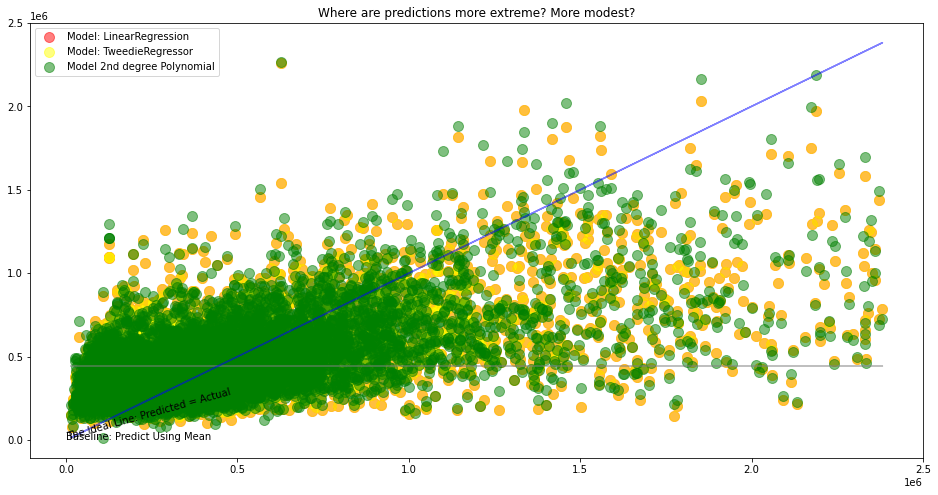

In [54]:
# plotting actual vs. predicted values

# y_validate.head()
plt.figure(figsize=(16,8))
plt.plot(y_validate.tax_value, y_validate.tax_value_pred_mean, alpha=.5, color="gray", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (16, 9.5))
plt.plot(y_validate.tax_value, y_validate.tax_value, alpha=.5, color="blue", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)

plt.scatter(y_validate.tax_value, y_validate.tax_value_pred_lm, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.tax_value, y_validate.tax_value_pred_glm, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.tax_value, y_validate.tax_value_pred_lm2, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()

plt.title("Where are predictions more extreme? More modest?")
# plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
# plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()

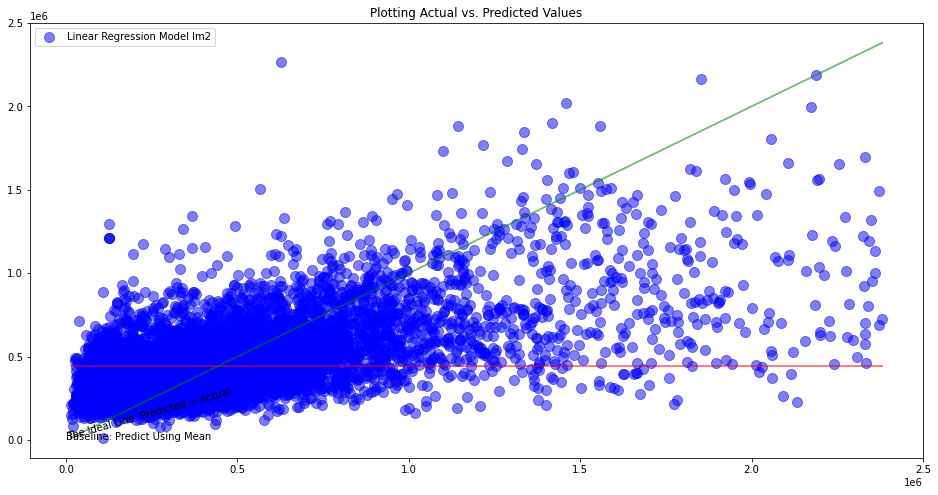

In [77]:
# plotting actual vs. predicted values

# y_validate.head()
plt.figure(figsize=(16,8))
plt.plot(y_validate.tax_value, y_validate.tax_value_pred_mean, alpha=.5, color="red", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (16, 9.5))
plt.plot(y_validate.tax_value, y_validate.tax_value, alpha=.5, color="green", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)

plt.scatter(y_validate.tax_value, y_validate.tax_value_pred_lm2, 
            alpha=.5, color="blue", s=100, label="Linear Regression Model lm2")
plt.legend()

plt.title("Plotting Actual vs. Predicted Values")
# plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
# plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()

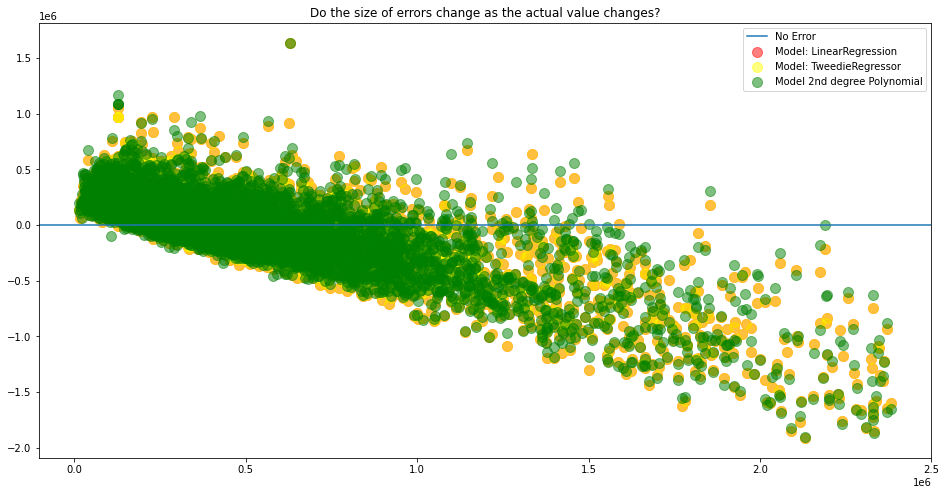

In [55]:
# Residual Plots: Plotting the Errors in Predictions

# y_validate.head()
plt.figure(figsize=(16,8))
plt.axhline(label="No Error")
plt.scatter(y_validate.tax_value, y_validate.tax_value_pred_lm-y_validate.tax_value, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.tax_value, y_validate.tax_value_pred_glm-y_validate.tax_value, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.tax_value, y_validate.tax_value_pred_lm2-y_validate.tax_value, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()

plt.title("Do the size of errors change as the actual value changes?")
# plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
# plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()

In [69]:
# Model Selection & Out-of-Sample Evaluation
# Model selected: lm2 (using LinearRegression)

y_test = pd.DataFrame(y_test)

# predict on test
y_test['tax_value_pred_lm2'] = lm2.predict(X_test_degree2)

# evaluate: rmse
rmse_test = mean_squared_error(y_test.tax_value, y_test.tax_value_pred_lm2)**(1/2)

print("RMSE for OLS Model using LinearRegression\nOut-of-Sample Performance: ", rmse_test)

RMSE for OLS Model using LinearRegression
Out-of-Sample Performance:  269196.96297603706


In [71]:
r2_score(y_test.tax_value, y_test.tax_value_pred_lm2)

0.41435581608402494

## Takeaway
 - baseline: 363349
 - test : 269196

# County Tax Rates

In [58]:
# getting the zillow data
df = get_zillow_data()

In [59]:
df.head()

,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id.1,logerror,transactiondate
0,14634203,2026522,1.0,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,289445.0,2016.0,213516.0,3490.16,NaN,NaN,6.059001e+13,625,-0.061973,2017-08-04
1,11721753,616260,NaN,NaN,NaN,2.0,3.0,NaN,6.0,2.0,...,205123.0,2016.0,163175.0,2627.48,NaN,NaN,6.037220e+13,1018,0.017785,2017-07-21
2,11289917,2061546,1.0,NaN,NaN,2.0,3.0,NaN,6.0,2.0,...,136104.0,2016.0,27214.0,2319.90,Y,15.0,6.037901e+13,1248,-0.362001,2017-06-23
3,11637029,2554497,1.0,NaN,NaN,2.0,3.0,NaN,9.0,2.0,...,810694.0,2016.0,554156.0,9407.01,Y,13.0,6.037701e+13,1734,-0.093399,2017-07-28
4,11705026,1834372,NaN,NaN,NaN,1.0,2.0,NaN,6.0,1.0,...,35606.0,2016.0,23624.0,543.69,NaN,NaN,6.037232e+13,1772,-0.146056,2017-06-30


In [60]:
# using my clean_zillow function but adding in tax_amount for county tax rates
def clean_zillow(df):
    
    # selecting features needed for zillow project
    features = ['parcelid', 'calculatedfinishedsquarefeet', 'bathroomcnt', 'bedroomcnt', 'taxvaluedollarcnt','yearbuilt', 'taxamount','fips']
    df = df[features]

    
    # renaming my columns to make them easier to use and read
    df = df.rename(columns={
                            'parcelid': 'parcel_id',
                            'calculatedfinishedsquarefeet': 'sqft',
                            'bathroomcnt': 'baths',
                            'bedroomcnt': 'beds',
                            'taxvaluedollarcnt':'tax_value',
                            'yearbuilt':'year_built',
                            'taxamount':'tax_amount'
        
    })
    
    # setting my index
    df = df.set_index('parcel_id')
    
    # dropping all nulls 
    df = df.dropna(subset=['sqft','tax_value', 'year_built'])
    
    return df

In [61]:
# using my 'clean_zillow' function
df = clean_zillow(df)

In [62]:
# adding county names in a new column
df["county_name"] = df["fips"].map({6037: "Los Angeles", 6059: "Orange", 6111: "Ventura"})

In [63]:
df.head() #check_yo_head

,sqft,baths,beds,tax_value,year_built,tax_amount,fips,county_name
parcel_id,,,,,,,,
14634203,1125.0,2.0,3.0,289445.0,1974.0,3490.16,6059.0,Orange
11721753,1316.0,2.0,3.0,205123.0,1923.0,2627.48,6037.0,Los Angeles
11289917,1458.0,2.0,3.0,136104.0,1970.0,2319.90,6037.0,Los Angeles
11637029,1766.0,2.0,3.0,810694.0,1980.0,9407.01,6037.0,Los Angeles
11705026,1421.0,1.0,2.0,35606.0,1911.0,543.69,6037.0,Los Angeles


In [64]:
# show counts by county
df.county_name.value_counts()

Los Angeles    24007
Orange         11079
Ventura         3394
Name: county_name, dtype: int64

In [65]:
# adding column 'tax_rate' which is the tax amount divided by the tax value
df['tax_rate'] = round(((df['tax_amount'] / df['tax_value'])* 100),2)
print(df.groupby('county_name').tax_rate.mean())

county_name
Los Angeles    1.373726
Orange         1.203326
Ventura        1.188712
Name: tax_rate, dtype: float64


(0.75, 2.0)

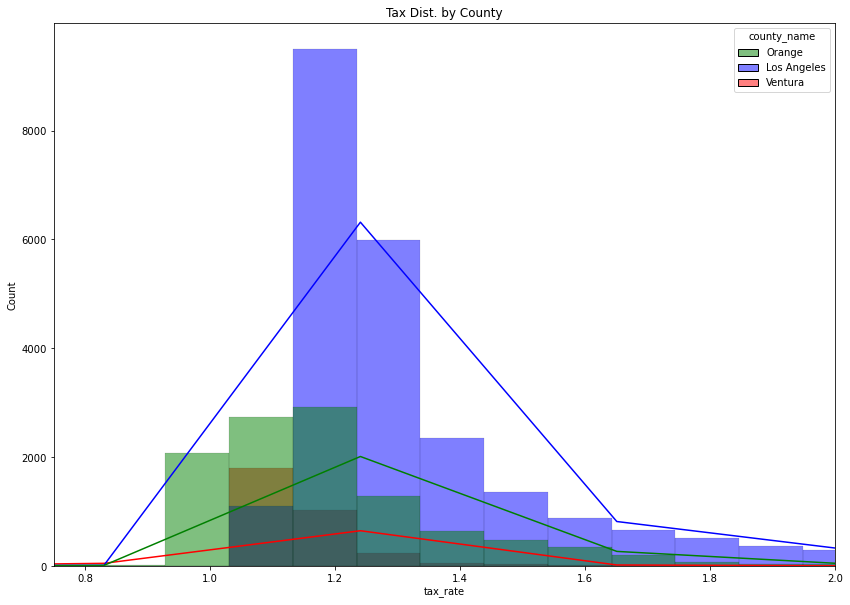

In [66]:
# plotting the tax rate by county
plt.figure(figsize=(14,10))
sns.histplot(data=df, x="tax_rate", hue="county_name",kde = True, bins = 800,  palette={'Los Angeles':'b', 'Orange':'g', 'Ventura':'r'}).set(title='Tax Dist. by County')

plt.xlim(.75, 2)